In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter

import semd_utils

In [9]:
events = np.loadtxt("../../tum-vie-3d/events_01_refact.txt")
# this data is already filtered by time, no need to redo it here

In [10]:
# use only the specified patch of input events
patch_center = (360, 640)
patch_size = 640
events = semd_utils.filter_patch(events, patch_center, patch_size)

data_steps = 50 # timesteps to divide the data into
sim_steps = 50 # simulation steps
shape = (patch_size, patch_size)
t_start = events[0, 0]
duration = events[-1, 0] - events[0, 0]

In [11]:
args = {
    "shape":shape,
    "conv_shape": (3, 3),
    "conv_stride": (3, 3),
    "thresh_conv": 0.5,
    "detector_du": 0.1
}
data = semd_utils.run_sim(args, events, data_steps, sim_steps)

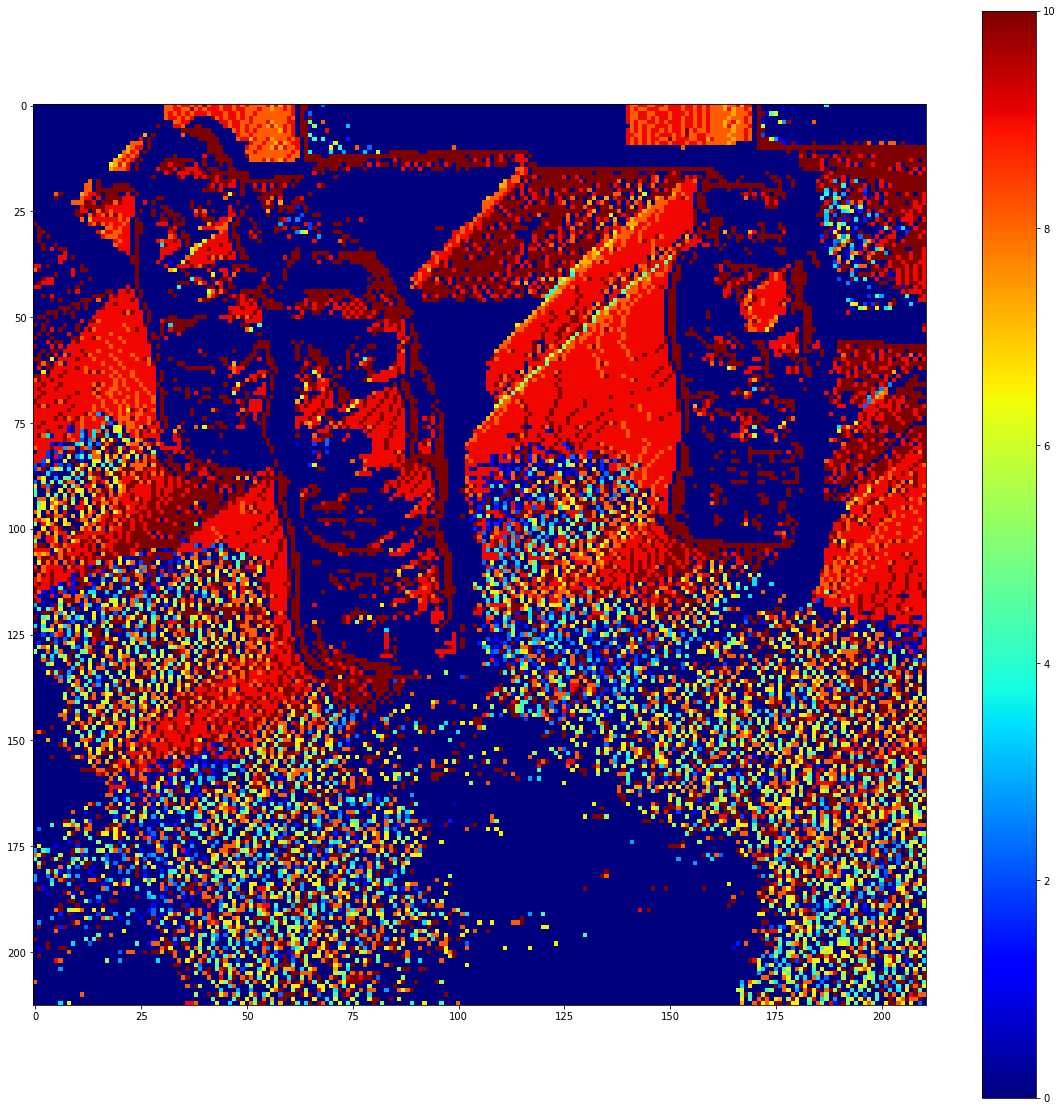

In [12]:
%matplotlib inline
plt.figure(figsize=(20, 20))
m = plt.imshow(np.delete(np.sum(data, axis=-1), 0, 1), cmap="jet")
plt.colorbar(m)

In [7]:
args = {
    "shape":shape,
    "conv_shape": (5, 5),
    "conv_stride": (5, 5),
    "thresh_conv": 0.5,
    "detector_du": 0.1
}
data = semd_utils.run_sim(args, events, data_steps, sim_steps)

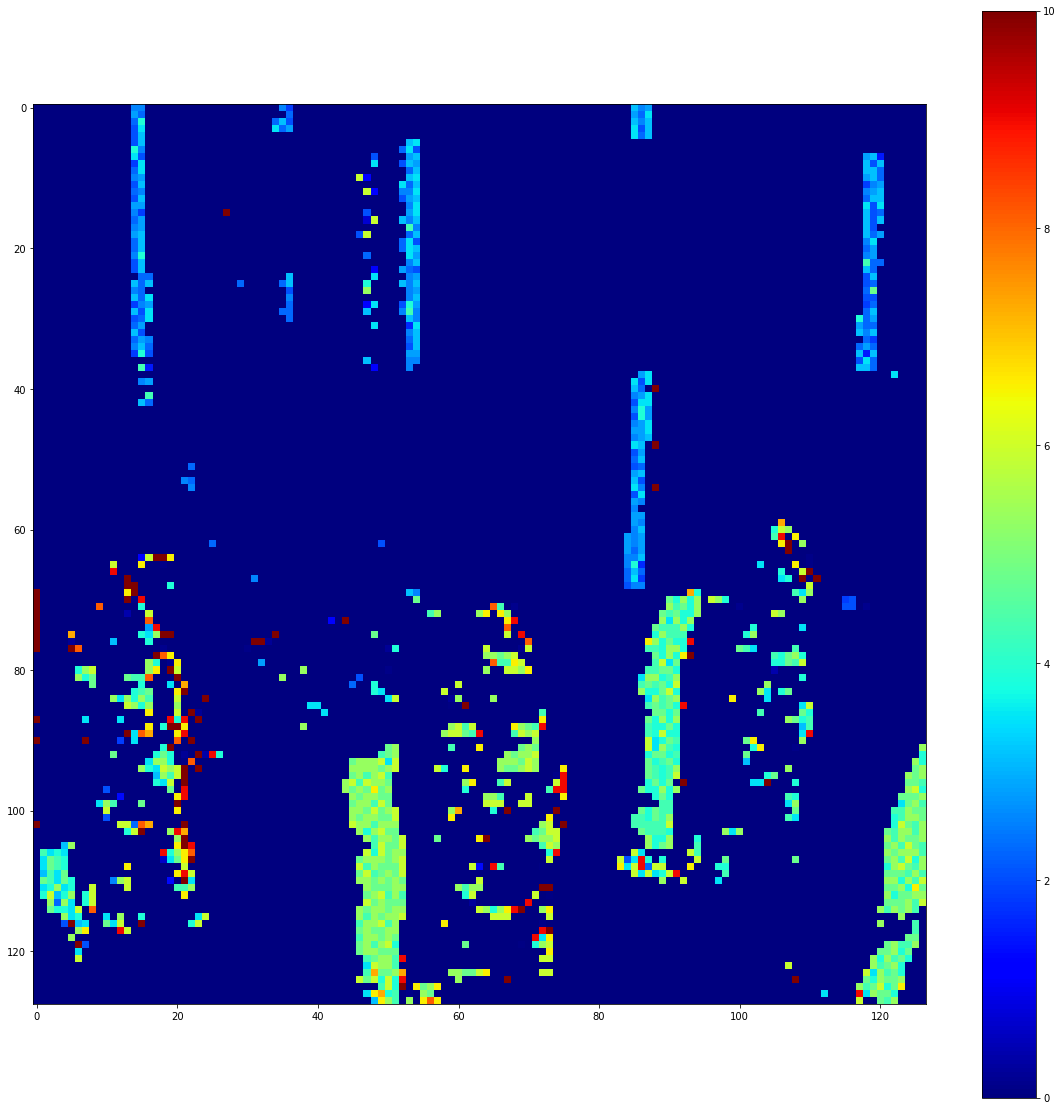

In [8]:
%matplotlib inline
plt.figure(figsize=(20, 20))
m = plt.imshow(np.sum(data, axis=-1), cmap="jet")
plt.colorbar(m)

In [14]:
args = {
    "shape":shape,
    "conv_shape": (3, 3),
    "conv_stride": (1, 1),
    "thresh_conv": 0.5,
    "detector_du": 0.1
}
data = semd_utils.run_sim(args, events, data_steps, sim_steps)

In [1]:
%matplotlib inline
plt.figure(figsize=(20, 20))
m = plt.imshow(np.sum(data, axis=-1), cmap="jet", vmin=600, vmax=1000)
plt.colorbar(m)

NameError: name 'plt' is not defined

In [10]:
np.save("semd_out_3x3x1_du1", data)

<IPython.core.display.Javascript object>


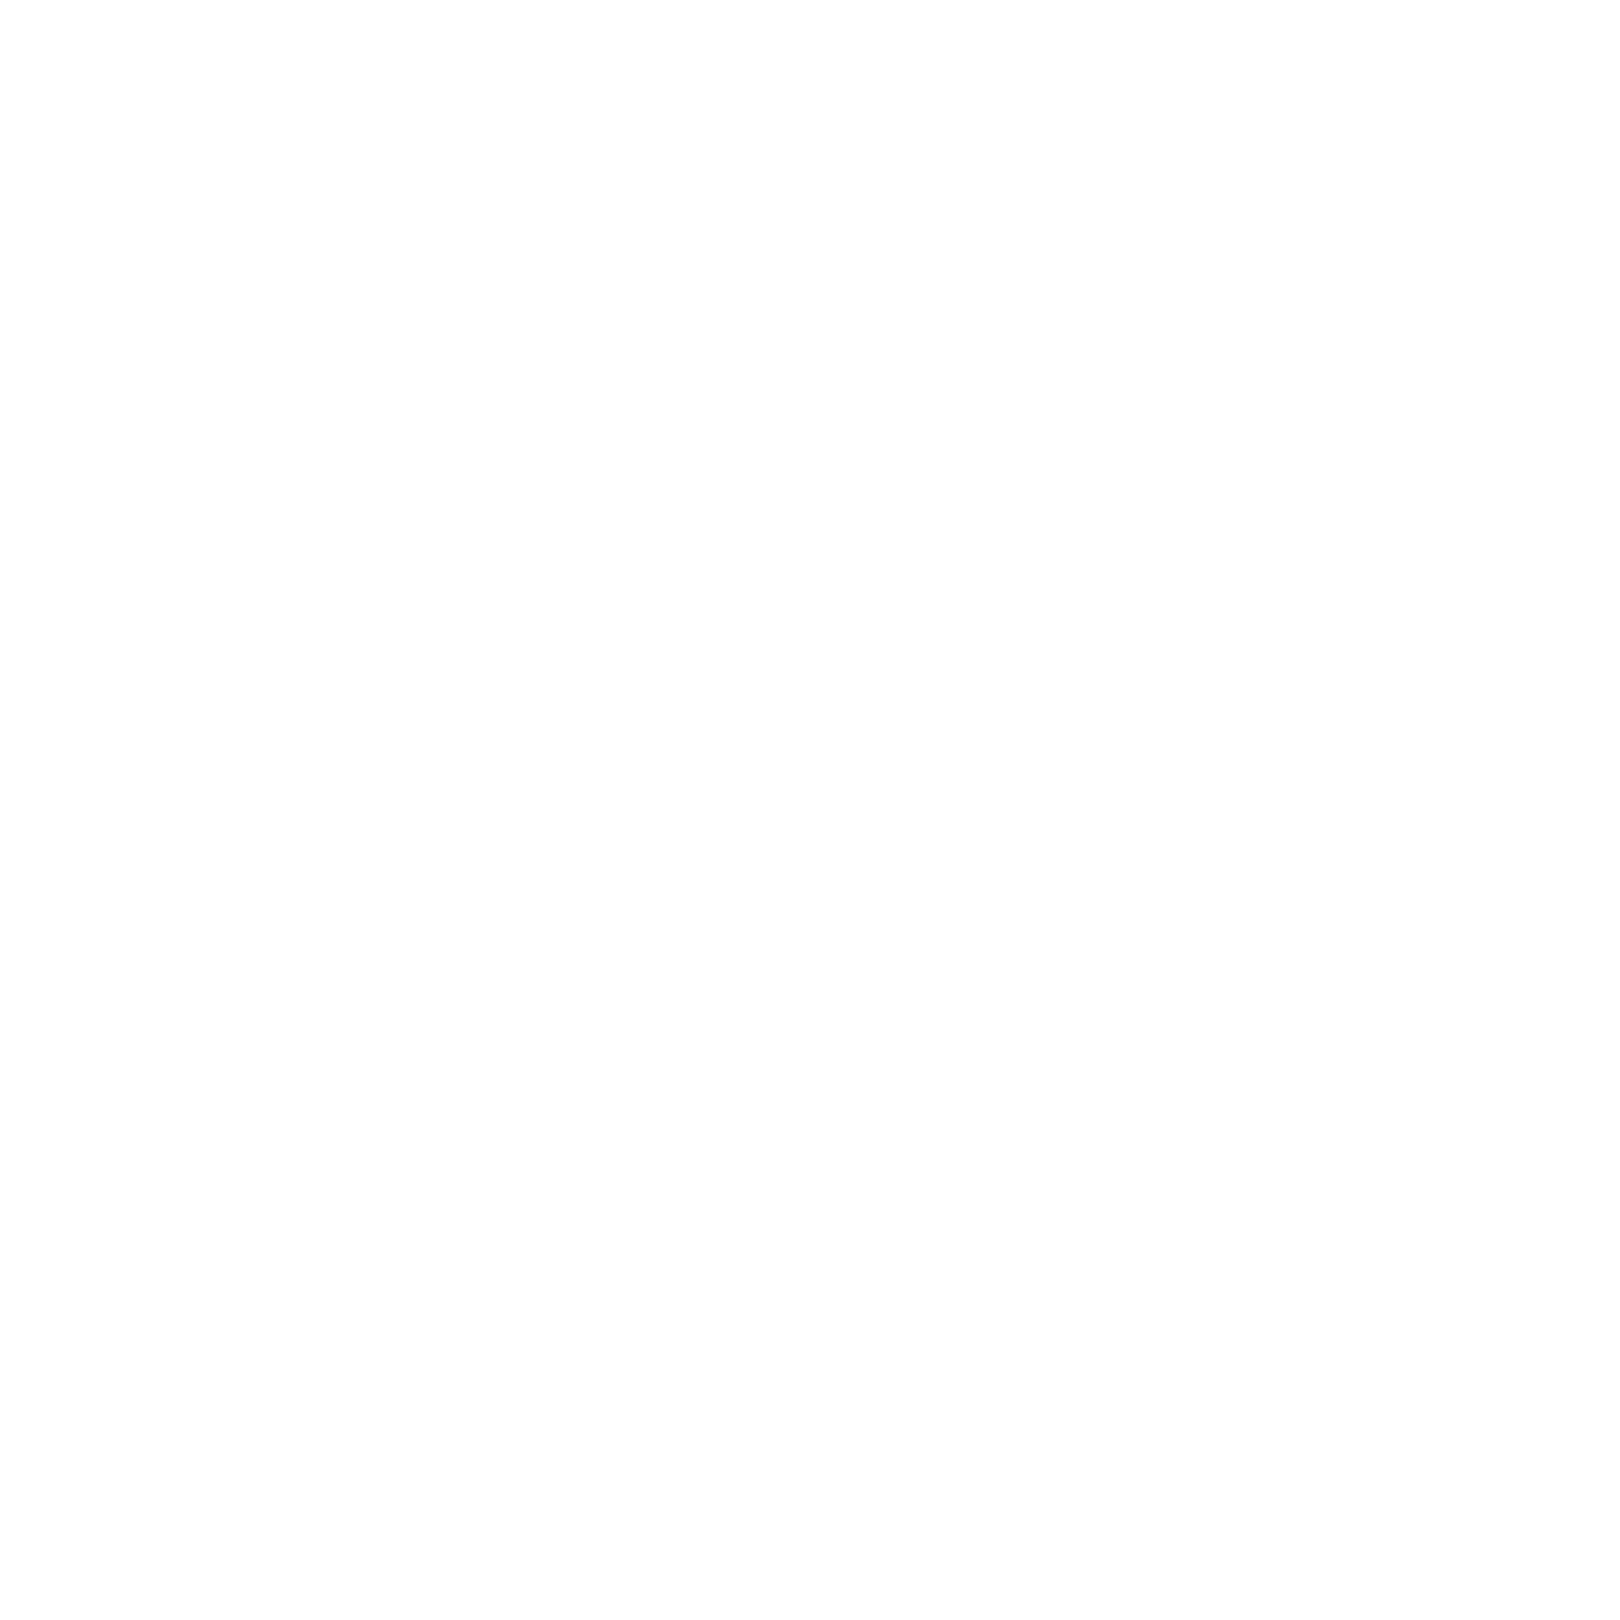

<IPython.core.display.Javascript object>


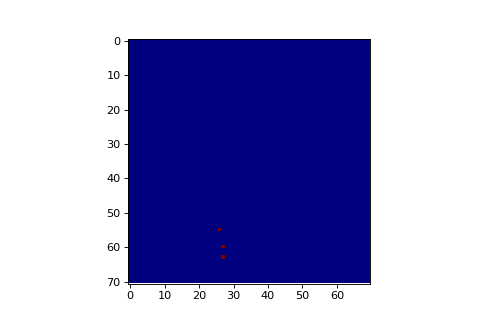

In [11]:
%matplotlib notebook
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
img_data = data[:,:,0]
img = plt.imshow(img_data, cmap="jet", vmin=0, vmax=10)

def update(frame):
    img_data = data[:,:,frame]
    img.set_array(img_data)
    return [img]

ani = FuncAnimation(fig, update, frames=sim_steps, blit=True, interval=duration/100)

In [12]:
ani.save("TLI_300.gif", dpi=300, writer=PillowWriter(fps=60))

In [13]:
# ani.save("TLIa.mp4", writer=FFMpegWriter(fps=60))